In [1]:
import numpy as np
import My_Jampy

In [74]:
#Primeiro lemos os dados do pPXF,MGE da fotometria e MGE DM.
y_px, x_px, vel,  disp, chi, sigma_disp = np.loadtxt('/home/carlos/Desktop/Tests JAM- Emcee/Gausian Prior/Output_Ppxf Second Run.txt', unpack=True) #pPXF
surf_mge, sigma_mge, qObs_mge = np.loadtxt('/home/carlos/Desktop/Tests JAM- Emcee/Gausian Prior/JAM Input.txt', unpack=True) #Fotometria
pot_DM, sigma_DM, qObs_DM = np.loadtxt('/home/carlos/Desktop/Tests JAM- Emcee/Gausian Prior/pseudo-DM Input.txt', unpack=True) #DM


In [75]:
#O JAM assume que a galáxia esteja com o seu semi-eixo maior sobre o eixo dos x, bem como o centro no ponto (0,0).
#Por esse motivo vamos transladar as posições de modo que o centro seja o px com maior dispersão. E depois 
#vamos rotacionar a galáxia para obter o semi-eixo maior sobre o eixo dos x. Como o find my galaxy retorna o
#P.A (Position Angle) medido no sentido antihorário a partir do eixo y, precisamos rotacionar os nossos eixos
#originais de 90°+P.A, para que o semi-eixo maior fique sobre o eixo x. No nosso caso, o P.A retornado é 67.7°

theta = 360-22.3        #ângulo de rotação em graus

#Transalação para que o centro seja o px (0,0)
x_new = x_px - 9.5
y_new = y_px - 9.5

#Rotação
x_rot = ( np.cos(theta*np.pi/180)*x_new + np.sin(theta*np.pi/180)*y_new )
y_rot = ( -np.sin(theta*np.pi/180)*x_new + np.cos(theta*np.pi/180)*y_new )

In [26]:
data[0]

array([ -12.39432584,   -5.18465881, -343.29183304,  303.6128395 ,
          0.99999997,   30.22572061])

In [23]:
data = np.column_stack([y_rot,x_rot, vel, disp, chi, sigma_disp])
np.savetxt('pPXF DATA.txt', data, 
           fmt=b'%10.6f\t   %10.6f\t \t%10.6f\t %10.6f\t %10.6f\t %10.6f\t',
          header='Data already rotate and centrelized\ny(px)\t\t x(px)\t\t Vel(kms⁻¹)\t Disp(kms⁻¹)\t\tchi2\t 1-sigma', delimiter='\t')

In [28]:
x_good[0]

2.9290698961314243

In [92]:


#Este bloco serve para separarmos apenas os px's internos a um certo raio. Isso leva em conta a elipticidade da galáxia
#Onde fica definido o r nós multiplicamos o valor em px de cada posição por 0.6 pois essa é a px scale, de modo que r tem unidade de arcsec.

x_good = []
y_good = []
disp_good = []
sigma_good = []

for i in range(len(disp)):
    r = np.sqrt((x_rot[i]*0.6)**2 + ((y_rot[i])*0.6/(1-0.24))**2)
    if r < 5:
        x_good.append(x_rot[i])
        y_good.append(y_rot[i])
        disp_good.append(disp[i])
        sigma_good.append(sigma_disp[i])




    #Aqui é onde realmente é feito o ajuste pelo Jampy

    #Definindo os parâmetros do pPXF
    xbin = np.array(x_good)*0.6
    ybin = np.array(y_good)*0.6

    inc = 120.                                           #Assumed galaxy inclination                  
    r = np.sqrt(xbin**2 + (ybin/(1-0.24))**2)           #Radius in the plane of the disk
    rms = np.sqrt(np.array(disp_good)**2)               #Vrms field in km/s
    erms = np.array(sigma_good)                         #1-sigma erro na dispersão

    sigmapsf = 0.2420                                   #Sigma psf de onde foram coletados os dados de cinemática, em arcsec
    pixsize = 0.6                                       #pixel scale, em px/arcsec, dos dados de cinemática
    goodBins =    (r > 0)                           #Informa quais valores de r são bons para gerar o modelo.

    #Parâmetros para o modelo JAM
    distance = 127.64                                            #Distance in Mpc
    mbh = 7e9                                                #Black hole mass in solar masses
    #beta = np.array([0.1,0.91, -0.9, -1.7, 0.43, -0.35, 0.32])   #Anisotropy parameter. One for each gaussian component 
    beta = np.array([-0.6, -1.0, 0.34, -3.4, 0.39, -0.31, 0.36])
    ml = np.array([9.5, 9.5, 8.5, 3.8, 3.4, 3.2, 2.8])           #Mass-to-light ratio in M_sun/L_sun

    #Parâmetros do MGE fotométrico
    surf_lum = surf_mge               #surface luminosity das gaussianas da fotometria, em unidades de L_sun/pc²
    sigma_lum = sigma_mge             #dispersão de cada gaussiana da fotometria, em arcsec.
    qobs_lum = qObs_mge               #axial ratio de cada gaussiana da fotometria.





In [77]:
Model = My_Jampy.Jam_axi_rms(ybin=ybin, xbin=xbin,beta=beta, mbh=mbh, distance=distance,
                                surf_lum=surf_lum, sigma_lum=sigma_lum, qobs_lum=qobs_lum,
                                surf_DM=pot_DM, sigma_DM=sigma_DM, qobs_DM=qObs_DM,ml=ml,goodBins=goodBins,
                                sigmapsf=sigmapsf, rms=rms, erms=erms, pixsize=pixsize, inc=inc)

Jampy Class successfully initialized!!


jam_axi_rms elapsed time sec: 0.53
inc=120.0 beta_z=-0.60 M/L=1 BH=7.00e+09 chi2/DOF=9.71
Total mass MGE: 8.148e+11


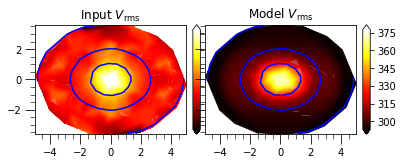

In [79]:
rmsModel, ml, chi2, chi2T = Model.run(plot=True, quiet=False)

In [80]:
surf_mge, sigma_mge, qObs_mge = np.loadtxt('/home/carlos/Desktop/Tests JAM- Emcee/Gausian Prior/JAM Input.txt', unpack=True) #Fotometria
pot_DM, sigma_DM, qObs_DM = np.loadtxt('/home/carlos/Desktop/Tests JAM- Emcee/Gausian Prior/pseudo-DM Input.txt', unpack=True) #DM
ybin, xbin, vel, disp, chi, sigma = np.loadtxt('pPXF DATA.txt', unpack=True)

In [83]:
x_good = []
y_good = []
disp_good = []
sigma_good = []

for i in range(len(disp)):
    r = np.sqrt((xbin[i]*0.6)**2 + ((ybin[i])*0.6/(1-0.24))**2)
    if r < 5:
        x_good.append(xbin[i])
        y_good.append(ybin[i])
        disp_good.append(disp[i])
        sigma_good.append(sigma[i])

In [85]:
xbin1 = np.array(x_good)*0.6
ybin1 = np.array(y_good)*0.6
r1 = np.sqrt(xbin1**2 + (ybin1/(1-0.24))**2)           #Radius in the plane of the disk
rms1 = np.sqrt(np.array(disp_good)**2)               #Vrms field in km/s
erms1 = np.array(sigma_good)                         #1-sigma erro na dispersão
goodBins1 =    (r1 > 0)

In [94]:
Model = My_Jampy.Jam_axi_rms(ybin=ybin1, xbin=xbin1,beta=beta, mbh=mbh, distance=distance,
                                surf_lum=surf_lum, sigma_lum=sigma_lum, qobs_lum=qobs_lum,
                                surf_DM=pot_DM, sigma_DM=sigma_DM, qobs_DM=qObs_DM,ml=ml,goodBins=goodBins1,
                                sigmapsf=sigmapsf, rms=rms1, erms=erms1, pixsize=pixsize, inc=inc)

Jampy Class successfully initialized!!


jam_axi_rms elapsed time sec: 0.52
inc=120.0 beta_z=-0.60 M/L=1 BH=7.00e+09 chi2/DOF=9.71
Total mass MGE: 8.148e+11


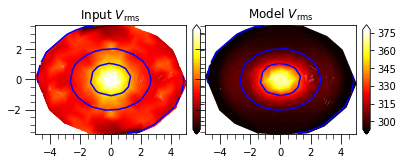

In [95]:
rmsModel2, ml2, chi22, chi2T2 = Model.run(plot=True, quiet=False)

In [93]:
ml

array([9.5, 9.5, 8.5, 3.8, 3.4, 3.2, 2.8])

In [1]:
import numpy as np
inte = 30
auto_corr = 0
np.column_stack([inte, auto_corr])

array([[30,  0]])

In [6]:
inte = 30500
auto_corr = 0.287

np.savetxt('Output LogFile.txt', np.column_stack([0, 0, 0]),
                            fmt=b'%i\t %e\t\t %e\t ', 
                            header="Output table for the combined model: Lens + Dynamic.\n Iteration\t Auto-correlation Time\t Processing Time")

In [17]:
for i in range(1000):
    if i%100 == 0:
        table = np.loadtxt("Output LogFile.txt")
        iteration = i
        auto_corr = np.random.rand(1)
        upt = np.column_stack([iteration, auto_corr, 0])
        np.savetxt('Output LogFile.txt', np.vstack([table, upt]),
                            fmt=b'\t%i\t %e\t\t %e\t', 
                            header="Output table for the combined model: Lens + Dynamic.\n Iteration\t Auto-correlation Time\t Processing Time")
        
        
        
        if i ==200:
            Text = np.array(["Your Model converged!!!!!"])
            np.savetxt('Congrats.txt', Text ,delimiter=" ",fmt='%s')

            

In [16]:
Text = np.array(["Your Model converged!!!!!"])
np.savetxt('Congrats.txt', Text ,delimiter=" ",fmt='%s')